In [1]:
import sys
sys.path.append("/mnt/data/src/ner")
sys.path.append("/mnt/data/src/dedup")

from file import load_object, load_json
from ocr.utils.extractor import *

In [2]:
text_samples = load_json("../text.json")
# regcognition = load_object("../regcognition.pkl")
# text_samples = extract_sorted_string_dict(regcognition)
list(text_samples.items())[-1]

('/mnt/data/src/ner/1bfbb942-8aed-439f-beab-0f0e280e51b5/test_poi_seg/17275785551437.jpg',
 'CHO THUÊ NHÀ ĐT 0976 705 788')

In [3]:
# !pip install ultralytics -q

In [4]:
detection = "../detection.pkl"
detection = load_object(detection)
detection = {str(key): value for key, value in detection.items()}

In [5]:
import matplotlib.pyplot as plt
from pathlib import Path
from cv2 import cvtColor, COLOR_BGR2RGB


def show_annotation_image(image, detection_dict, title=None, annotation_folder=None):
    results = detection_dict[image]
    annotation = results[0].plot(conf=False, labels=False, line_width=1) 
    annotation = cvtColor(annotation, COLOR_BGR2RGB)
    plt.imshow(annotation)
    plt.title(title)
    plt.axis("off")
    if annotation_folder:
        plt.savefig(Path(annotation_folder) / Path(image).name, bbox_inches="tight")
    else:
        plt.show()

In [6]:
i = -1

Mỹ Phẩm KHÁNH DIỄM Chuyên Bán Buôn Bán Lẻ HÓA MỸ PHẨM PHỤ LIỆU TÓC SPA Tín HN 0965 630 828 Cs2 1015 Phó Giáp Bát f fmPhánh Diễm HN O 0984 657 786


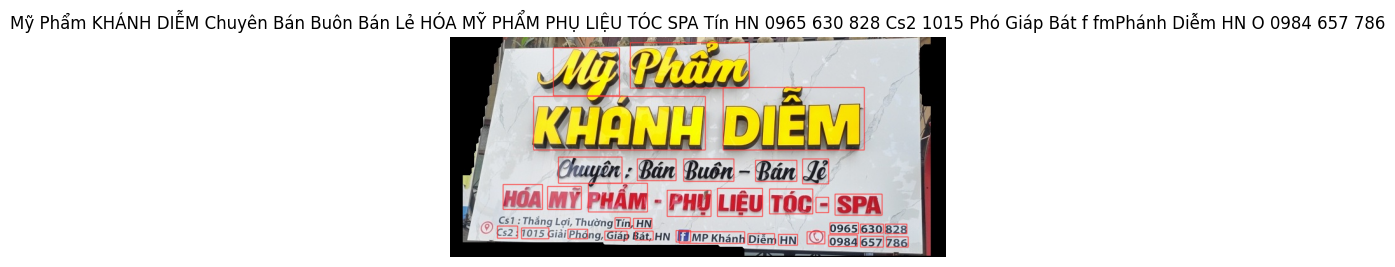

In [35]:
i -= 1
image_path = '/mnt/data/src/ner/1bfbb942-8aed-439f-beab-0f0e280e51b5/test_poi_seg/17275784778442.jpg'
text = text_samples[image_path]
# image_path, text = list(text_samples.items())[i]
print(text)
show_annotation_image(image_path, detection, text)

['NG', 'HƯƠNG', 'HOA']
['NO', 'PVC', 'LAM', 'SÓNG', 'CUNG', 'CẤP', 'CÁC', 'LOẠI', 'SƠN', 'CHÍNH', 'HÀNG']
['NGOẠI', 'THẤT', 'DULUX', 'AQUATEX', 'KOVA']
['DỤNG', 'VÀ', 'CÔNG', 'TRÌNH']
['K771']
['U', 'MUA', 'MÁY', 'CŨ']
['Hotline', '0912', '242', '566', '033', '2435', '484']


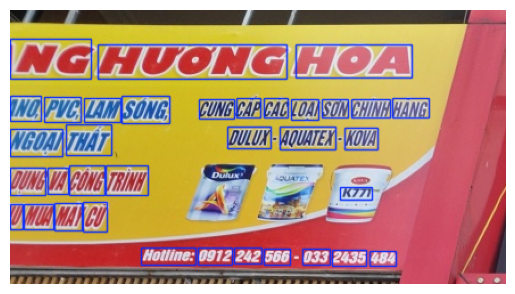

In [72]:
i += 1

regcognition = load_object("../regcognition.pkl")
image_path, results = list(regcognition.items())[i]
# image_path = '/mnt/data/src/ner/1bfbb942-8aed-439f-beab-0f0e280e51b5/test_out_od/crops/POI/17275784778442.jpg'
# results = regcognition[image_path]
results = filter_text(results, vocab)
sorted_results = [row_res for row_res in sort_by_bounding_boxes_v2(results)]
for row in sorted_results:
    print([x.text for x in row])
# print(text_samples[image_path])
show_annotation_image(image_path, detection)

Save annotation

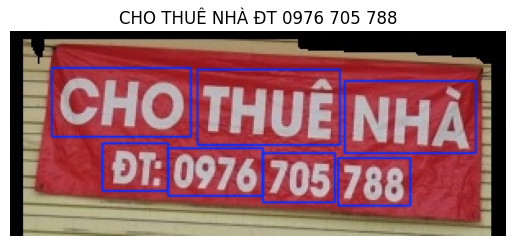

In [31]:
annotation_folder = "/mnt/data/src/ner/1bfbb942-8aed-439f-beab-0f0e280e51b5/test_annotation_2"
Path(annotation_folder).mkdir(parents=True, exist_ok=True)

for image in detection:
    text = text_samples[str(image)]

    if text:
        show_annotation_image(image, detection, text, annotation_folder)

### Huggingface fine-tuned model

In [10]:
from fine_tune.inference import *

save_model = "/mnt/data/src/ner/fine_tune/train2/model"
model_fine_tuned = AutoModelForTokenClassification.from_pretrained(save_model)
tokenizer = AutoTokenizer.from_pretrained(save_model)
nlp = pipeline(
    "ner", 
    model=model_fine_tuned, 
    tokenizer=tokenizer, 
    aggregation_strategy="simple", 
    device=0
)

In [11]:
results = [nlp(test_example) for test_example in text_samples]
len(results)

/mnt/data/src/ner/.venv/lib/python3.10/site-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


4171

### Spacy model

In [13]:
import spacy

model_path = "../spacy_model/result/model-best"
nlp_ner = spacy.load(model_path)

In [14]:
from dataset import color_options

def display2(text):
    doc = nlp_ner(text)

    spacy.displacy.render(
        doc, 
        style="ent", 
        options={"colors": color_options},
    )

In [18]:
import warnings
warnings.filterwarnings("ignore")
from random import randint

n = 10
indices = [randint(0, len(results)) for _ in range(n)]
for index in indices:
    display(text_samples[index], results[index], ent_maps, colors)

In [19]:
for index in indices:
    display2(text_samples[index])